In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
zgony=pd.read_excel('zgony_org.xlsx',sheet_name='Arkusz1', header=0)
#2.5 min

In [2]:
Num=38036100 #liczba ludzi GUS 2021
Num_k=0.517*Num
Num_m=0.483*Num
#print(zgony.head())  wypisze pierwsze 5
#zgony['przyczyna wyjściowa'].head() wypisze pierwsze 5 z kolumny przyczyny wyjsciowej
#zgony['przyczyna wyjściowa'].unique() wypisze unikatowe przyczyny w

female=zgony[  zgony['płeć'] == 2  ]
male=zgony[  zgony['płeć'] == 1  ]

x,y=zgony.shape
mx,my=male.shape
fx,fy=female.shape

print(zgony.shape)
print(male.shape)
print(female.shape)

#4s

(519517, 24)
(268658, 24)
(250859, 24)


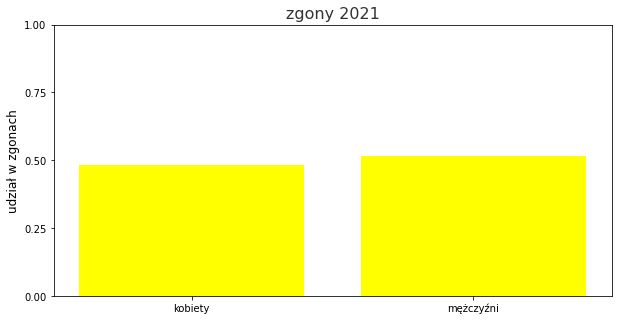

In [3]:
# Make a dataset:
height = [fx/x, mx/x]
bars = ('kobiety', 'mężczyźni')
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
# Create bars
plt.bar(y_pos, height, color = 'yellow')
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0, 1,5))

plt.ylabel('udział w zgonach', fontsize=12)
plt.title('zgony 2021', fontsize=16, color='#323232')
 
# Show graphic
plt.savefig('female_vs_male.png')
plt.show();

#3s

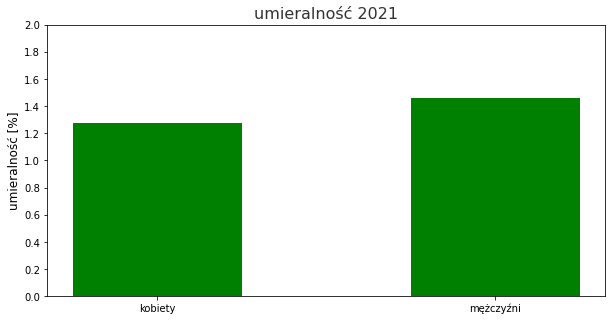

In [4]:
height = [fx*100/Num_k, mx*100/Num_m]
bars = ('kobiety', 'mężczyźni')
y_pos = np.arange(len(height))
#Figsize
plt.figure(figsize=(10,5))
# Create bars
plt.bar(y_pos, height, color = 'green', width=0.5)
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0.0, 2.0, num=11))


plt.ylabel('umieralność [%]', fontsize=12)
plt.title('umieralność 2021', fontsize=16, color='#323232')
 

# Show graphic
plt.savefig('female_vs_male_smierterlnosc.png')
plt.show();

#2s

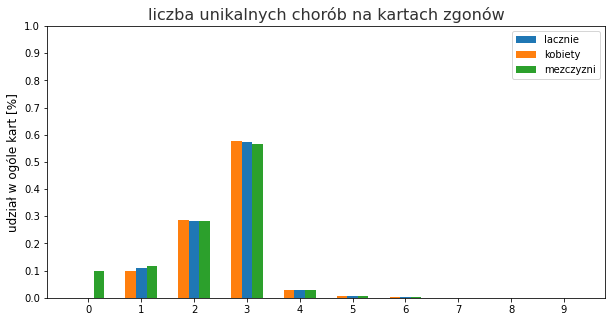

In [5]:
wiersze=1 #liczba wierszy która chcemy zbadać

#for index, row in zgony.iloc[0:wiersze, :].iterrows():

    # start_column = 2
    # for column in zgony.iloc[:,start_column:17]:
    #     print(column)
    #     if pd.isna(row[column]):
    #         print("nan")
    #         break
    #     else:
    #         values[index]+=1 

counts1=np.empty(10) 
counts2=np.empty(10) 
counts3=np.empty(10) 

def funkcja(df):
    a=(df.nunique(axis=1)-2)
    counts=a.value_counts()
    return counts,a

cfemale,f=funkcja(female)
cmale,m=funkcja(male)
counts,all=funkcja(zgony)

for i in range(1,10,1):
    counts1[i]=counts[i]/len(all)
    counts2[i]=cfemale[i]/len(f)
    counts3[i]=cmale[i]/len(m)

y_pos = np.arange(len(counts3))
bars = ('0', '1' , '2' , '3', '4', '5', '6', '7', '8', '9')

#Figsize
plt.figure(figsize=(10,5))
# Create bars
plt.bar(y_pos, counts1, width=0.2, label='lacznie')
plt.bar(y_pos-0.2, counts2, width=0.2, label='kobiety')
plt.bar(y_pos+0.2, counts3, width=0.2, label='mezczyzni')
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0.0, 1.0, num=11))
plt.ylabel('udział w ogóle kart [%]', fontsize=12)
plt.title('liczba unikalnych chorób na kartach zgonów', fontsize=16, color='#323232')
# Show graphic
plt.legend()
plt.savefig('unikalnezgony1.png')
plt.show(); #TEN WYKRES SIE LUBI *zepsuc* JAK SIE PUSZCZA X RAZY, WTEDY RESTART KERNELA I DZIAŁA

<class 'pandas.core.series.Series'>
A     11994
B      1916
C    138039
D     15152
E     23942
F     11602
G     20241
H        26
I    663493
J    191300
K     37617
L      2742
M      1205
N     27647
O        28
P      2205
Q      1074
R    171375
S      4452
T      3423
U    105323
V      3297
W      7999
X     12452
Y      3892
Z       430
dtype: int64


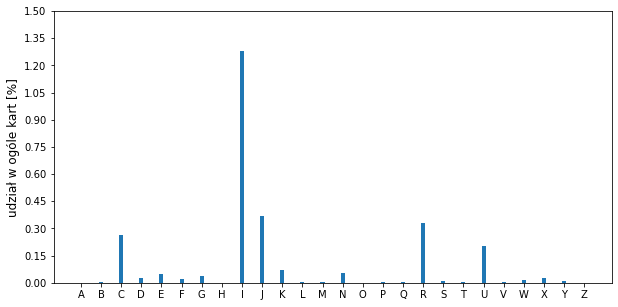

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

zgony3=zgony.iloc[:,2:17].fillna(1)

zgony3['przyczyna wtórna 10']=zgony3['przyczyna wtórna 10'].astype(str) #z jakiegoś powodu w tej kolumnie nan zmieniało się na 1.0, a nie 1
kolumny=list(zgony3.columns)
for i in kolumny:  # XD *przepraszam* za fora, chcialam tez jakims ilocem ale sie *psulo*. A LICZY SIE TYLKO 12 SEKUND 
    zgony3[i]=zgony3[i].str.replace('\d+','')
print(type(zgony3.stack()))
#print(zgony3.stack().apply(pd.Series.value_counts).fillna(0).astype(int).sum())
#print(np.unique(zgony3.stack()[i].unique(), return_counts=True))
letters = zgony3.stack().value_counts().sort_index()
letters=letters.drop('RI')
letters=letters.drop('.')
letters=letters.drop('')
print(letters)
y_pos = np.arange(len(letters))
bars = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
     'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z')
letters1=np.empty(len(letters))
suma=sum(letters)
for i in range(1,len(letters),1):
    letters1[i]=letters[i]/x # x == liczba zgonow, 2 komorka zdefiniowana
#Figsize
plt.figure(figsize=(10,5))
# Create bars
#space=0
#for i in range(0,len(letters)):
plt.bar(y_pos, letters1, width=0.2)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks( np.linspace(0.0, 1.5, num=11))
plt.ylabel('udział w ogóle kart [%]', fontsize=12)
plt.title('', fontsize=16, color='#323232')
# Show graphic
plt.savefig('unikalnezgony12.png')
plt.show(); 

In [7]:
zgony4=zgony.iloc[:,2:17].fillna(1)
zgony4['przyczyna wtórna 10']=zgony3['przyczyna wtórna 10'].astype(str)
zgony5=zgony4.transpose()
zgony6=zgony5.drop_duplicates()
zgony6 = zgony6.replace(1, np.nan)
zgony6 = zgony6.replace(".", np.nan)
#print(zgony6)
letters1 = zgony6.stack().value_counts()
print(letters1)
count_choroby=letters1.count()
print(letters1.count()) #liczba chorób
# ok 6 min / u mnie 8(paula) (ale w tym samym czasie liczylam suchego)


I46    237166
I50    187199
U07    102108
J96     80732
I25     69951
        ...  
B89         1
E53         1
A80         1
N77         1
R32         1
Length: 1364, dtype: int64
1364


Węzeł: I46, Waga: 237166
Węzeł: I50, Waga: 187199
Węzeł: U07, Waga: 102108
Węzeł: J96, Waga: 80732
Węzeł: I25, Waga: 69951
Węzeł: R09, Waga: 42232
Węzeł: I70, Waga: 39649
Węzeł: J12, Waga: 34789
Węzeł: R96, Waga: 34389
Węzeł: R99, Waga: 32398
Węzeł: J18, Waga: 29143
Węzeł: C34, Waga: 25579
Węzeł: J80, Waga: 20142
Węzeł: I21, Waga: 18910
Węzeł: I63, Waga: 18462
Węzeł: R64, Waga: 17103
Węzeł: R54, Waga: 16880
Węzeł: R57, Waga: 15336
Węzeł: E11, Waga: 14257
Węzeł: I69, Waga: 13968
Węzeł: C80, Waga: 13419
Węzeł: I11, Waga: 11677
Węzeł: I10, Waga: 10340
Węzeł: N17, Waga: 10333
Węzeł: C18, Waga: 9337
Węzeł: R98, Waga: 9206
Węzeł: C79, Waga: 8966
Węzeł: K70, Waga: 8640
Węzeł: A41, Waga: 7911
Węzeł: C50, Waga: 7769
Węzeł: N18, Waga: 7767
Węzeł: J44, Waga: 7692
Węzeł: J15, Waga: 7334
Węzeł: I61, Waga: 7016
Węzeł: C61, Waga: 6664
Węzeł: G93, Waga: 6647
Węzeł: I64, Waga: 6623
Węzeł: X70, Waga: 6241
Węzeł: I48, Waga: 6142
Węzeł: C25, Waga: 5735
Węzeł: I26, Waga: 5445
Węzeł: C16, Waga: 5302
Węzeł: 

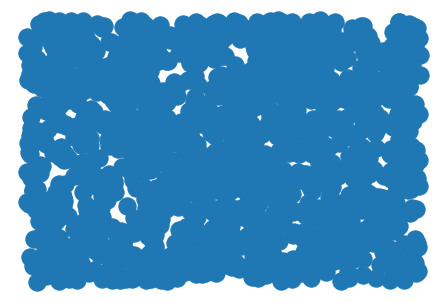

In [93]:
import networkx as nx
G = nx.Graph()
# Dodanie węzłów
num_nodes = count_choroby
nodes = range(num_nodes)
G.add_nodes_from(nodes)
for node in nodes:
    weight = letters1[node]
    G.nodes[node]['weight'] = weight
mapping = {node: new_label for node, new_label in zip(G.nodes, letters1.index)}
G = nx.relabel_nodes(G, mapping)
for node, data in G.nodes(data=True):
    print(f'Węzeł: {node}, Waga: {data["weight"]}')
# nx.set_node_attributes(G, dict(letters1) , 'weight')
# for node, data in G.nodes(data=True):
#     print(f'Węzeł: {node}, Waga: {data["weight"]}')

pos = nx.random_layout(G)
nx.draw(G, pos)


In [94]:
import itertools

# Tworzenie połączeń między współwystępującymi węzłami z DataFrame i obliczanie wag
for column in zgony6.columns:
    values = zgony6[column].dropna().tolist()
    combinations = list(itertools.combinations(values, 2))
    for combination in combinations:
        node1, node2 = combination
        if G.has_edge(node1, node2):
            if 'weight' in G[node1][node2]:
                G[node1][node2]['weight'] += 1
            else:
                G[node1][node2]['weight'] = 1
        else:
            G.add_edge(node1, node2, weight=1)

# Wyświetlanie informacji o grafie
print("Węzły grafu:")
print(G.nodes())
print("Połączenia grafu:")
for edge in G.edges(data=True):
    print(edge)


Węzły grafu:
['I46', 'I50', 'U07', 'J96', 'I25', 'R09', 'I70', 'J12', 'R96', 'R99', 'J18', 'C34', 'J80', 'I21', 'I63', 'R64', 'R54', 'R57', 'E11', 'I69', 'C80', 'I11', 'I10', 'N17', 'C18', 'R98', 'C79', 'K70', 'A41', 'C50', 'N18', 'J44', 'J15', 'I61', 'C61', 'G93', 'I64', 'X70', 'I48', 'C25', 'I26', 'C16', 'G30', 'F10', 'C67', 'I67', 'C78', 'C20', 'N39', 'I42', 'C71', 'I24', 'K92', 'F03', 'C56', 'D38', 'D37', 'U10', 'W19', 'E10', 'K74', 'C22', 'C64', 'K72', 'G20', 'I71', 'K55', 'K65', 'A04', 'K85', 'K56', 'F01', 'J81', 'C54', 'S06', 'C15', 'I74', 'C76', 'K25', 'N19', 'D64', 'W01', 'K27', 'C32', 'J84', 'E87', 'C53', 'X59', 'G40', 'X45', 'C43', 'C90', 'E41', 'L89', 'K76', 'N03', 'C91', 'I35', 'I20', 'I27', 'B97', 'J16', 'C92', 'I49', 'I60', 'S72', 'C24', 'D48', 'J45', 'C85', 'J17', 'K26', 'J69', 'I13', 'I51', 'C23', 'E86', 'C26', 'K63', 'D43', 'I85', 'K80', 'L08', 'D46', 'C49', 'E66', 'D41', 'I12', 'G12', 'K57', 'E14', 'Y20', 'P29', 'G35', 'V43', 'V03', 'T06', 'I34', 'X31', 'Y34', 'R04',

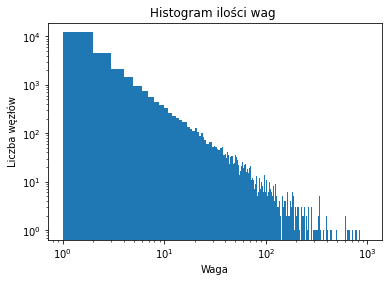

In [61]:
# Tworzenie histogramu ilości wag //zlogarytmowac, ma byc prosta
weights = [weight for _, _, weight in G.edges(data='weight') if weight <1000]
plt.hist(weights, bins=1000, log=True)
plt.gca().set_xscale("log")
# Konfiguracja wykresu
plt.title("Histogram ilości wag ")
plt.xlabel("Waga")
plt.ylabel("Liczba węzłów")

# Wyświetlanie histogramu
plt.savefig('wagi.png')
plt.show()

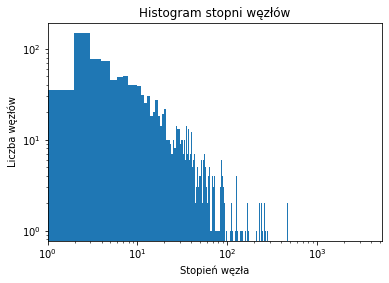

In [86]:
degrees = [degree for _, degree in G.degree() if degree <600]

f, ax = plt.subplots(1)
# Tworzenie histogramu stopni węzłów
plt.hist(degrees, bins=600, log=True)
plt.gca().set_xscale("log")
ax.set_xlim(xmin=1)
# Konfiguracja wykresu
plt.title("Histogram stopni węzłów")
plt.xlabel("Stopień węzła")
plt.ylabel("Liczba węzłów")

# Wyświetlanie histogramu
plt.savefig('stopnie.png')
plt.show()

In [112]:
#usuwam z sieci edges<1000

usunac=[]
for u, v, data in G.edges(data=True):
        if 'weight' in data and data['weight'] < 1000:
            usunac.append((u, v))

G.remove_edges_from(usunac)

edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))

for edge in edges:
    print(edge)

nodes_below_threshold = [node for node, degree in G.degree() if degree < 1]
G.remove_nodes_from(nodes_below_threshold)


('R64', 'C80', {'weight': 1003})
('I50', 'C16', {'weight': 1005})
('J12', 'B97', {'weight': 1019})
('J96', 'I21', {'weight': 1029})
('J96', 'U10', {'weight': 1029})
('I50', 'C67', {'weight': 1035})
('I50', 'C25', {'weight': 1041})
('I46', 'C64', {'weight': 1054})
('I46', 'U10', {'weight': 1056})
('I46', 'C22', {'weight': 1066})
('J44', 'J44', {'weight': 1069})
('U07', 'N17', {'weight': 1090})
('I46', 'X70', {'weight': 1104})
('C25', 'C25', {'weight': 1108})
('I25', 'N18', {'weight': 1119})
('C80', 'C80', {'weight': 1126})
('I46', 'I71', {'weight': 1127})
('R64', 'C18', {'weight': 1128})
('I70', 'I10', {'weight': 1143})
('R99', 'R54', {'weight': 1154})
('J15', 'J15', {'weight': 1171})
('G30', 'G30', {'weight': 1180})
('I50', 'I61', {'weight': 1185})
('C61', 'C61', {'weight': 1186})
('I46', 'K55', {'weight': 1216})
('I46', 'K74', {'weight': 1222})
('I25', 'E11', {'weight': 1222})
('U07', 'A41', {'weight': 1226})
('I46', 'D38', {'weight': 1229})
('J80', 'B97', {'weight': 1233})
('J96', 'R

[1.4862331206405304, 2.7547938015192512, 2.057236549894596, 6.43868516598433, 5.702923227024306, 6.296824596572466, 1.83877978864004, 3.1534813214040835, 2.4576411454889016, 2.2010098692292237, 1.1652372195299023, 9.73978096947428, 1.5744487571492725, 2.30699419639977, 3.042842238580385, 2.558645474986065, 3.4998412662417833, 2.7846803127907602, 2.399536992375358, 1.5702087617751836, 1.6609903337734657, 2.8753743717606195, 4.441721388030646, 1.2754084313139329, 1.3051181300301262, 1.1902380714238083, 3.2492734230559575, 1.1623730516108464, 1.6673332000533068, 1.2342339054382412, 1.8138357147217055, 1.7947454167962404, 2.0030532250098156, 1.7130220210039464, 1.7735714125897373, 1.2516655570345725, 1.2197449642354659, 1.8577166390790365, 1.6964014199999298, 1.3093679560934903, 2.5002222123465567, 1.0821788720498617, 1.8888562088676253, 1.168569876197207, 1.9891371663780923, 1.5297058540778354, 1.1190273554396346, 2.0124611797498106, 1.965536398374076, 1.6299284237863534, 1.50886270636750

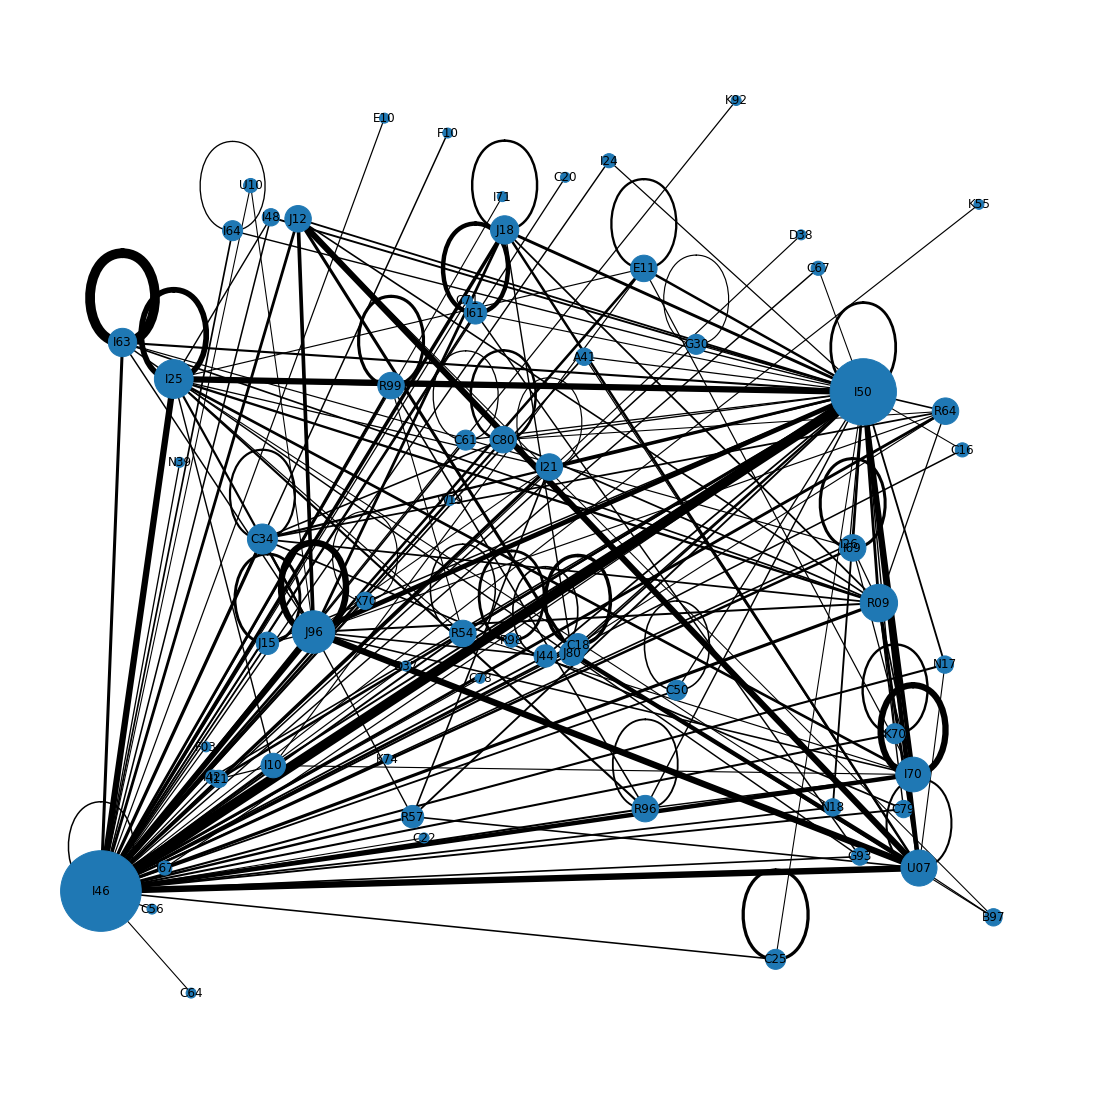

In [138]:
import math

weights = (nx.get_edge_attributes(G,'weight').values()) #zbieram zartosci z edges

result = [math.sqrt(i)/30 for i in weights] #przeksztalcam wartosci edges tak zeby wazniejsze byly grubsze, troche to splaszczam bo byl rozrzut 1000-90000
print(result)



degree = [degree for node, degree in G.degree()]
degree = [100*i for i in degree] #to samo co wczesniej, tym razem dla wezlow
print(degree)

pos = nx.random_layout(G) #to zeby nody byly porozrzucane, a nie ukladaly sie w jakies kolka

plt.figure(1,figsize=(15,15)) 
nx.draw(G,pos, width=result, with_labels=True, node_size=degree)
plt.show()